In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

In [43]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('train.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.0 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
tweet_id       500
user_handle    437
timestamp      500
tweet_text     197
candidate        5
party            5
retweets        24
likes           44
sentiment        4
dtype: int64


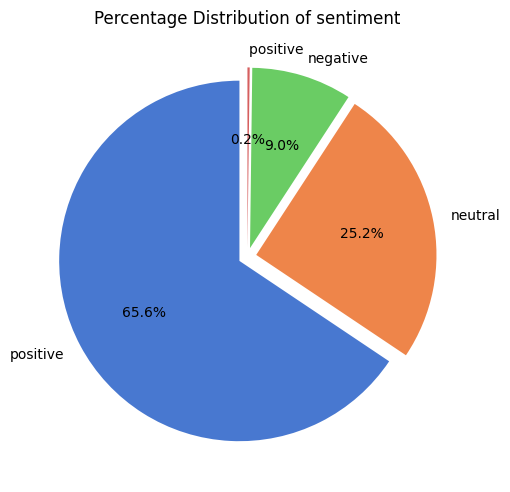

In [44]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [45]:
df['sentiment'] = df['sentiment'].str.strip()
print(df['sentiment'].unique())

['positive' 'neutral' 'negative']


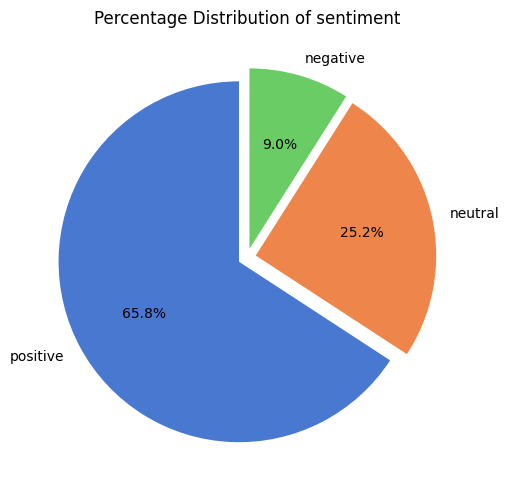

In [46]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [47]:
import re
import numpy as np
def clean_text(text):
    if pd.isna(text):
        return np.nan
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [48]:
df['Clean_text'] = df['tweet_text'].apply(clean_text)

In [49]:
df = df.drop(columns=['tweet_id', 'user_handle', 'timestamp', 'retweets', 'likes'])

In [50]:
pd.set_option('display.max_colwidth', None)
print(df.iloc[10]['tweet_text'])
print(df.iloc[10]['Clean_text'])

Kamala Harris is tackling education issues head-on.
kamala harris is tackling education issues head on


In [51]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
def tokenize_text(text):
    tokens = word_tokenize(text)  
    return tokens  
df['Tokens'] = df['Clean_text'].apply(tokenize_text)

In [53]:
custom_stopwords = {'kamala', 'harris','trump', 'jill', 'stein', 'robert', 'kennedy', 'oliver'}

In [54]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Get the set of English stopwords
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    return [word for word in tokens if word.lower() not in stop_words]  # Filter out stopwords

In [55]:
df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

In [56]:
from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]

word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(20)

print(most_common_words_after_removal)


[('chase', 100), ('policies', 77), ('new', 46), ('tax', 39), ('initiatives', 36), ('voters', 35), ('reforms', 35), ('stance', 30), ('healthcare', 30), ('sustainable', 27), ('independent', 25), ('latest', 25), ('solutions', 25), ('economic', 25), ('trade', 23), ('policy', 22), ('gaining', 22), ('plans', 21), ('climate', 21), ('leading', 19)]


In [57]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [58]:
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

In [59]:
df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

In [60]:
df.head(10)

,tweet_text,candidate,party,sentiment,Clean_text,Tokens,Filtered_Tokens,Lemmatized_Tokens
0,Excited to see Kamala Harris leading the Democratic charge!,Kamala Harris,Democratic Party,positive,excited to see kamala harris leading the democratic charge,"[excited, to, see, kamala, harris, leading, the, democratic, charge]","[excited, see, leading, democratic, charge]","[excite, see, lead, democratic, charge]"
1,Donald Trump's policies are the best for our economy.,Donald Trump,Republican Party,positive,donald trump s policies are the best for our economy,"[donald, trump, s, policies, are, the, best, for, our, economy]","[donald, policies, best, economy]","[donald, policies, best, economy]"
2,Jill Stein's environmental plans are exactly what we need.,Jill Stein,Green Party,positive,jill stein s environmental plans are exactly what we need,"[jill, stein, s, environmental, plans, are, exactly, what, we, need]","[environmental, plans, exactly, need]","[environmental, plan, exactly, need]"
3,Robert Kennedy offers a fresh perspective outside the two-party system.,Robert Kennedy,Independent,neutral,robert kennedy offers a fresh perspective outside the two party system,"[robert, kennedy, offers, a, fresh, perspective, outside, the, two, party, system]","[offers, fresh, perspective, outside, two, party, system]","[offer, fresh, perspective, outside, two, party, system]"
4,Chase Oliver's libertarian stance promotes true freedom.,Chase Oliver,Libertarian Party,positive,chase oliver s libertarian stance promotes true freedom,"[chase, oliver, s, libertarian, stance, promotes, true, freedom]","[chase, libertarian, stance, promotes, true, freedom]","[chase, libertarian, stance, promote, true, freedom]"
5,Kamala Harris has been a strong advocate for healthcare reform.,Kamala Harris,Democratic Party,positive,kamala harris has been a strong advocate for healthcare reform,"[kamala, harris, has, been, a, strong, advocate, for, healthcare, reform]","[strong, advocate, healthcare, reform]","[strong, advocate, healthcare, reform]"
6,Trump's tax policies will benefit small businesses.,Donald Trump,Republican Party,positive,trump s tax policies will benefit small businesses,"[trump, s, tax, policies, will, benefit, small, businesses]","[tax, policies, benefit, small, businesses]","[tax, policies, benefit, small, businesses]"
7,Jill Stein's green initiatives could save our planet.,Jill Stein,Green Party,positive,jill stein s green initiatives could save our planet,"[jill, stein, s, green, initiatives, could, save, our, planet]","[green, initiatives, could, save, planet]","[green, initiatives, could, save, planet]"
8,Robert Kennedy is running as an independent; interesting choice.,Robert Kennedy,Independent,neutral,robert kennedy is running as an independent interesting choice,"[robert, kennedy, is, running, as, an, independent, interesting, choice]","[running, independent, interesting, choice]","[run, independent, interest, choice]"
9,Chase Oliver promotes minimal government intervention. Love it!,Chase Oliver,Libertarian Party,positive,chase oliver promotes minimal government intervention love it,"[chase, oliver, promotes, minimal, government, intervention, love, it]","[chase, promotes, minimal, government, intervention, love]","[chase, promote, minimal, government, intervention, love]"


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

In [62]:
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(5)

,tweet_text,candidate,party,sentiment,Clean_text,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,Excited to see Kamala Harris leading the Democratic charge!,Kamala Harris,Democratic Party,positive,excited to see kamala harris leading the democratic charge,"[excited, to, see, kamala, harris, leading, the, democratic, charge]","[excited, see, leading, democratic, charge]","[excite, see, lead, democratic, charge]",excite see lead democratic charge
1,Donald Trump's policies are the best for our economy.,Donald Trump,Republican Party,positive,donald trump s policies are the best for our economy,"[donald, trump, s, policies, are, the, best, for, our, economy]","[donald, policies, best, economy]","[donald, policies, best, economy]",donald policies best economy
2,Jill Stein's environmental plans are exactly what we need.,Jill Stein,Green Party,positive,jill stein s environmental plans are exactly what we need,"[jill, stein, s, environmental, plans, are, exactly, what, we, need]","[environmental, plans, exactly, need]","[environmental, plan, exactly, need]",environmental plan exactly need
3,Robert Kennedy offers a fresh perspective outside the two-party system.,Robert Kennedy,Independent,neutral,robert kennedy offers a fresh perspective outside the two party system,"[robert, kennedy, offers, a, fresh, perspective, outside, the, two, party, system]","[offers, fresh, perspective, outside, two, party, system]","[offer, fresh, perspective, outside, two, party, system]",offer fresh perspective outside two party system
4,Chase Oliver's libertarian stance promotes true freedom.,Chase Oliver,Libertarian Party,positive,chase oliver s libertarian stance promotes true freedom,"[chase, oliver, s, libertarian, stance, promotes, true, freedom]","[chase, libertarian, stance, promotes, true, freedom]","[chase, libertarian, stance, promote, true, freedom]",chase libertarian stance promote true freedom


In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(df, column_name, condition_column, condition_value):
    """
    สร้าง WordCloud จากข้อมูลใน DataFrame
    Parameters:
        df (DataFrame): ข้อมูลในรูปแบบ pandas DataFrame
        column_name (str): ชื่อคอลัมน์ที่มีข้อความ
        condition_column (str): ชื่อคอลัมน์สำหรับการกรองข้อมูล
        condition_value (str): ค่าของเงื่อนไขที่ใช้กรอง
    """
    # กรองข้อมูลตามเงื่อนไข
    filtered_text = " ".join(df[df[condition_column] == condition_value][column_name])
    
    # กำหนด Stopwords
    stopwords = set(STOPWORDS)
    
    # สร้าง WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords,
        collocations=True,
        max_words=2000
    ).generate(filtered_text)
    
    # แสดงผล WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # ซ่อนแกน x และ y
    plt.title(f"WordCloud for {condition_column} = {condition_value}", fontsize=16)
    plt.show()


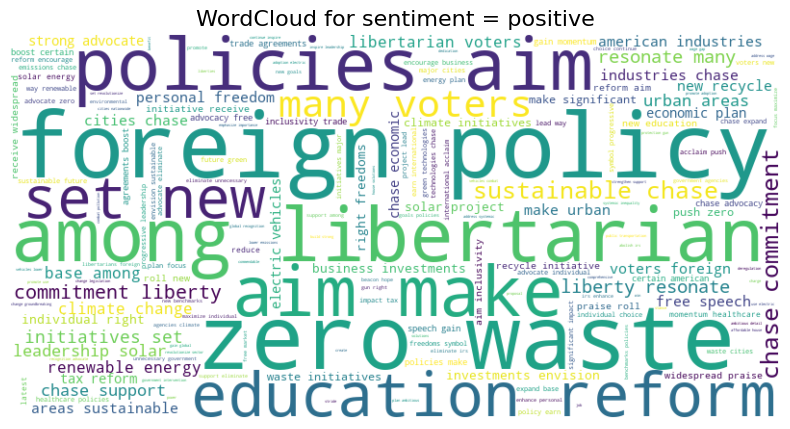

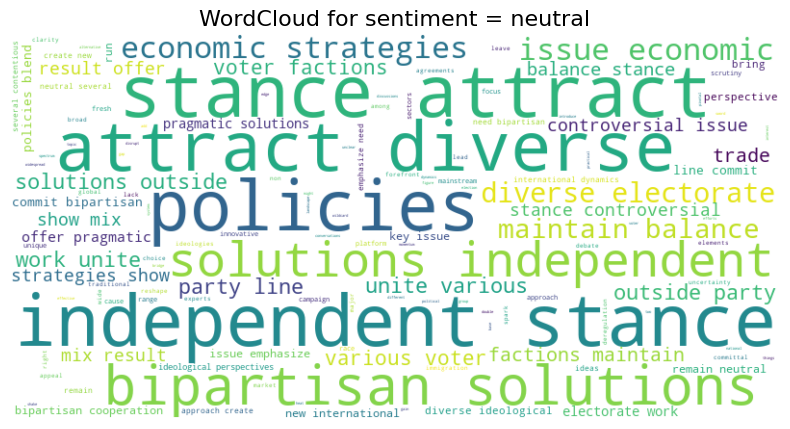

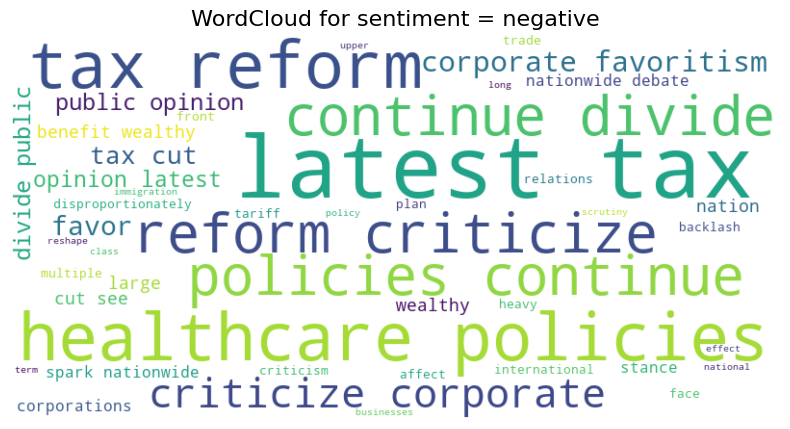

In [64]:
generate_wordcloud(df, column_name='TFIDF_Tokens', condition_column='sentiment', condition_value='positive')
generate_wordcloud(df, column_name='TFIDF_Tokens', condition_column='sentiment', condition_value='neutral')
generate_wordcloud(df, column_name='TFIDF_Tokens', condition_column='sentiment', condition_value='negative')

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = tfidf_matrix  # Features from TF-IDF
y = df['sentiment']   # Target labels


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

real_accuracy= accuracy*100
real_precision= precision*100
real_recall= recall*100
real_f1= f1*100

print(f"Logistic Regression Accuracy: {real_accuracy:.4f} %")
print(f"Precision: {real_precision:.4f} %")
print(f"Recall: {real_recall:.4f} %")
print(f"F1 Score: {real_f1:.4f} %")

Logistic Regression Accuracy: 96.0000 %
Precision: 96.2222 %
Recall: 96.0000 %
F1 Score: 95.8905 %


Classification Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00         6
     neutral       1.00      0.85      0.92        26
    positive       0.94      1.00      0.97        68

    accuracy                           0.96       100
   macro avg       0.98      0.95      0.96       100
weighted avg       0.96      0.96      0.96       100



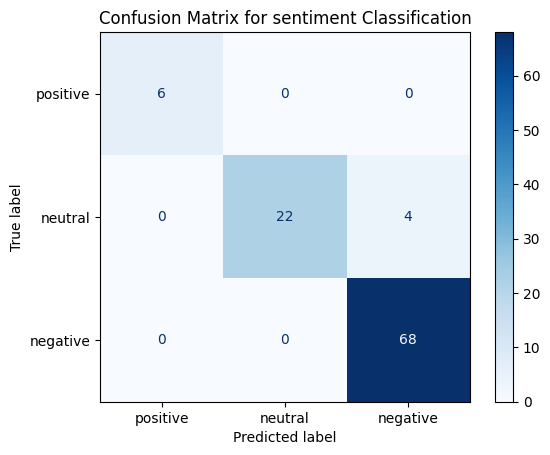

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_class = model.predict(X_test)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['positive', 'neutral','negative'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for sentiment Classification")
plt.show()

In [68]:
# Load the new dataset
test_df = pd.read_csv('test.csv')

# Preprocess the data
test_df['Clean_text'] = test_df['tweet_text'].apply(clean_text)
test_df['Tokens'] = test_df['Clean_text'].apply(tokenize_text)
test_df['Filtered_Tokens'] = test_df['Tokens'].apply(remove_stopwords)
test_df['Lemmatized_Tokens'] = test_df['Filtered_Tokens'].apply(lemmatize_tokens)

# Apply TF-IDF transformation
test_df['TFIDF_Tokens'] = test_df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
tfidf_matrix_test = TfidfVectorizer(stop_words='english', max_features=10000, vocabulary=feature_names)
X_test_new = tfidf_matrix_test.fit_transform(test_df['TFIDF_Tokens'])

# Predict the sentiment
y_pred_new = model.predict(X_test_new)

# Add predictions to the dataframe
test_df['Predicted_Sentiment'] = y_pred_new



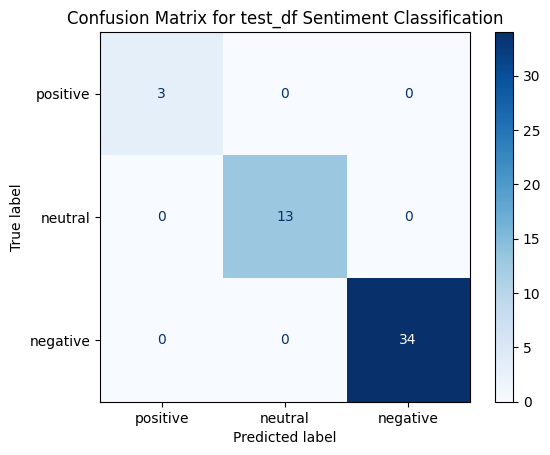

In [69]:
# Compute confusion matrix for test_df
cm_test = confusion_matrix(test_df['sentiment'], test_df['Predicted_Sentiment'])

# Plot confusion matrix for test_df
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['positive', 'neutral', 'negative'])
disp_test.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for test_df Sentiment Classification")
plt.show()

In [78]:
test_df.head()

,tweet_id,user_handle,timestamp,tweet_text,candidate,party,retweets,likes,sentiment,Clean_text,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens,Predicted_Sentiment
0,501,@user1068,2025-02-11 08:30:10,Kamala Harris's new policy on education reform is impressive.,Kamala Harris,Democratic Party,85,320,positive,kamala harris s new policy on education reform is impressive,"[kamala, harris, s, new, policy, on, education, reform, is, impressive]","[new, policy, education, reform, impressive]","[new, policy, education, reform, impressive]",new policy education reform impressive,positive
1,502,@politicsNew2,2025-02-11 09:15:20,Donald Trump's latest speech on the economy was well-received.,Donald Trump,Republican Party,100,450,positive,donald trump s latest speech on the economy was well received,"[donald, trump, s, latest, speech, on, the, economy, was, well, received]","[donald, latest, speech, economy, well, received]","[donald, latest, speech, economy, well, receive]",donald latest speech economy well receive,positive
2,503,@greenVisionary2,2025-02-11 10:05:35,Jill Stein's environmental policies are a step in the right direction.,Jill Stein,Green Party,60,200,positive,jill stein s environmental policies are a step in the right direction,"[jill, stein, s, environmental, policies, are, a, step, in, the, right, direction]","[environmental, policies, step, right, direction]","[environmental, policies, step, right, direction]",environmental policies step right direction,positive
3,504,@indieWatcher2,2025-02-11 11:25:40,Robert Kennedy's independent run brings fresh perspectives to the race.,Robert Kennedy,Independent,30,120,neutral,robert kennedy s independent run brings fresh perspectives to the race,"[robert, kennedy, s, independent, run, brings, fresh, perspectives, to, the, race]","[independent, run, brings, fresh, perspectives, race]","[independent, run, bring, fresh, perspectives, race]",independent run bring fresh perspectives race,neutral
4,505,@libertyFan4,2025-02-11 12:40:50,Chase Oliver's stance on gun rights is unwavering.,Chase Oliver,Libertarian Party,50,160,positive,chase oliver s stance on gun rights is unwavering,"[chase, oliver, s, stance, on, gun, rights, is, unwavering]","[chase, stance, gun, rights, unwavering]","[chase, stance, gun, right, unwavering]",chase stance gun right unwavering,positive
